## Business Goal

Determine which is the most effective sales approach to market the new product line

## Business Questions

* How many customers were there for each approach?
* What does the spread of the revenue look like overall? And for each method?
* Was there any difference in revenue over time for each of the methods?
* Based on the data, which method would you recommend we continue to use?
    * Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.
 
**Determine if there are other differences between the customers in each group**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import pingouin as pg

In [2]:
sns.set_style('darkgrid')
sns.set_palette('bright')
sns.set_context("notebook")

%matplotlib inline

In [3]:
file_name = 'product_sales.csv'
sales = pd.read_csv(file_name)

sales.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


## Data validation

![Alt text](sales_schema.png "Table Description")

In [4]:
sales_mod = sales.copy()
sales_mod.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [5]:
sales_mod.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


Observations:
* Maximum `years_as_customer` seems a bit too high considering that the company was founded in 1984.
* The count of `revenue` column is only 139296 instead of 15000. This may be due to null values.
* `revenue` mean and median is 93 and 89 respectively, while the maximum value is 238. Distribution must be looked into.
* `nb_sold` mean and median close to each other. This may indicate distribution is not too skewed.
* No negative values.


In [6]:
sales_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Dataset has 15000 rows and 8 columns. The `revenue` column has null values.

### checking week column

In [7]:
# checking values in week column

sales_mod['week'].value_counts()

week
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: count, dtype: int64

### checking sales_method column

In [8]:
# checking values in sales_method column

sales_mod['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [9]:
sales_mod['sales_method'] = sales_mod['sales_method'].str.lower()
sales_mod['sales_method'] = sales_mod['sales_method'].replace({'em + call': 'email + call'})

sales_mod['sales_method'].value_counts()

sales_method
email           7466
call            4962
email + call    2572
Name: count, dtype: int64

### checking customer_id column

In [10]:
# checking values in customer_id column. must be 15000 unique values.
sales_mod['customer_id'].nunique()

15000

### checking nb_sold column

In [11]:
# checking values in nb_sold column

sales_mod['nb_sold'].value_counts()

nb_sold
10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: count, dtype: int64

### checking revenue column

In [12]:
# checking nan values in revenue column. recall we have nan values

sales_mod[sales_mod['revenue'].isna()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
16,2,email,0f744f79-1588-4e0c-8865-fdaecc7f6dd4,10,NaN,6,30,Pennsylvania
17,6,email + call,d10690f0-6f63-409f-a1da-8ab0e5388390,15,NaN,0,24,Wisconsin
28,5,email,f64f8fd5-e9b7-4326-9f5d-ef283f14d7ad,12,NaN,4,32,Florida
...,...,...,...,...,...,...,...,...
14951,5,call,5f1c099a-3cf2-4c32-91f0-5ec802926073,10,NaN,10,25,Virginia
14957,1,call,b7947946-8b0a-4031-8835-226200f260a5,7,NaN,5,23,Illinois
14970,4,email + call,72be03aa-25b1-4574-b358-74118cd8d81a,12,NaN,12,25,Washington
14992,5,email + call,cd9e6945-ae21-4bed-a6cf-f0302e6c4795,12,NaN,1,34,New York


In [13]:
# creating a dictionary with the mean revenues by number of products sold
median_revenue_dict = sales_mod[sales_mod['revenue'].notnull()]. \
                        groupby('nb_sold')['revenue'].mean().round(2).to_dict()

median_revenue_dict

{7: 35.09,
 8: 64.53,
 9: 79.17,
 10: 91.03,
 11: 88.44,
 12: 170.16,
 13: 125.85,
 14: 91.64,
 15: 226.83,
 16: 234.14}

In [14]:
# filling nan revenue values with the calculated means

sales_mod['revenue'] = sales_mod['revenue'].fillna(sales_mod['nb_sold'].map(median_revenue_dict))

### checking years_as_customer column

In [15]:
# checking values in years_as_customer column.

sales_mod['years_as_customer'].describe()

count    15000.000000
mean         4.965933
std          5.044952
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64

In [16]:
# getting the correct maximum years_as_customer considering that the company was established in 1984
current_year = datetime.now().year
max_years_as_customer = current_year - 1984

print(f"Maximum years as customer: {max_years_as_customer}")

Maximum years as customer: 41


In [17]:
# setting the correct maximum years_as_customer
sales_mod['years_as_customer'] = sales_mod['years_as_customer'].clip(upper=max_years_as_customer)

In [18]:
sales_mod['years_as_customer'].describe()

count    15000.000000
mean         4.964067
std          5.028153
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         41.000000
Name: years_as_customer, dtype: float64

### checking nb_site_visits column

In [19]:
# checking nb_site_visits column

sales_mod['nb_site_visits'].unique()

array([24, 28, 26, 25, 22, 31, 23, 30, 21, 27, 32, 29, 20, 18, 19, 35, 16,
       17, 33, 36, 34, 15, 37, 14, 13, 12, 41])

### checking state column

In [20]:
# checking state column. there are 50 states in the US. unique values should not exceed 50

print(f"Unique values: {sales_mod['state'].nunique()}")

Unique values: 50


In [21]:
# checking for typos
sales_mod['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

### Data validation summary

* `week`: int
    * no missing values. values are correct (integer values from 1-6). data validated. no cleaning required.
 
* `sales_method`: object
    *  converted to lower case for uniformity. reduced into three categories (call, email, email + call)

* `customer_id`: object
    * 15000 unique values. data validated. no cleaning required.
 
* `nb_sold`: int
    *  data validated. no cleaning required.
 
      
* `revenue`: float
    *  nan values replaced with mean revenue grouped by the number of products sold. This was done because we have no information of the individual products sold. As there are multiple different products, the
revenue will vary depending on which products were sold. Instead, we impute the nan values with the average revenue per number of units sold.
 
      
* `years_as_customer`: int
    *  corrected the maximum years as customer considering the company was established in 1984. max value should be 41, as of year 2025.
 
      
* `nb_site_visits`: int
    *  data validated. no cleaning required.
 
      
* `state`: object
    *  data validated. 50 unique values. no cleaning required.

## Exploratory Data Analysis


sales_method
email           7466
call            4962
email + call    2572
Name: count, dtype: int64


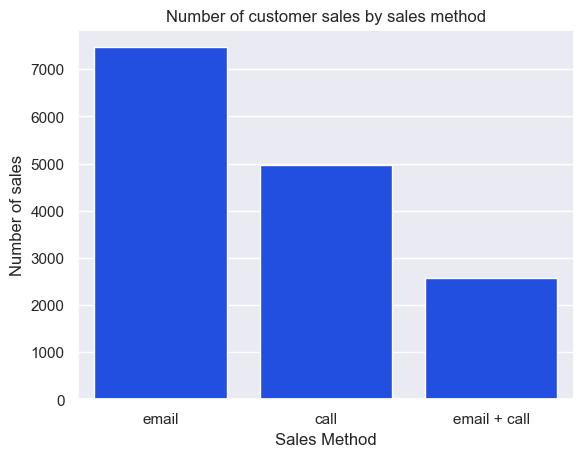

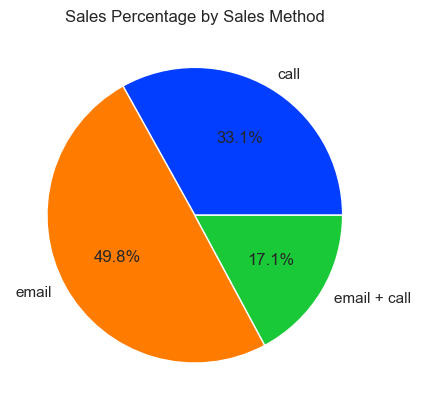

In [22]:
# How many customers were there for each approach?

print(sales_mod['sales_method'].value_counts())

order= ['email', 'call', 'email + call']

sns.countplot(data=sales_mod, x='sales_method', order=order)
plt.xlabel('Sales Method')
plt.ylabel('Number of sales')
plt.title('Number of customer sales by sales method')
plt.savefig('1_sales_by_method.png')
plt.show()

sales_count_by_method = sales_mod.groupby('sales_method')['sales_method'].value_counts().reset_index()

plt.pie(sales_count_by_method['count'], 
        labels=sales_count_by_method['sales_method'], 
        autopct='%1.1f%%')
plt.title('Sales Percentage by Sales Method')
plt.savefig('2_sales_by_method_pie_chart.png')
plt.show()

From the data over the last 6 weeks, the **email method had the most number of sales** of 7000+. This was followed by the call method (approx. 5000 sales), and lastly the email + call method (approx. 2600 sales) where follow-up calls where done on emailed customers. 

The email method comprised approximately 50% of the total sales, while the call method contributed to 33%. The email + call method only contributed 17% of the total sales.

In terms of effort, the email method has the least effort and can be automated. The call method required the most effort since the sales team had to talk to the customer for 30 minutes on average. In the email + call method, the email required little work while the call only took 10 minutes on average.

In other words, the following sales order method is sorted with **increasing effort**: email, email + call, call

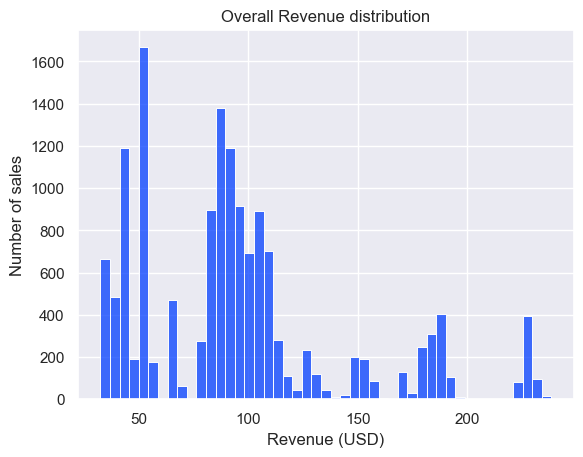

In [23]:
# What does the spread of the revenue look like overall? 

sns.histplot(data=sales_mod, x='revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Number of sales')
plt.title('Overall Revenue distribution')
plt.savefig('3_revenue_distribution.png')
plt.show()

A histogram was plotted to determine the overall spread of the revenue. The distribution is right-skewed where most of the sales are in the lower end of the revenue distribution. This is typical in business sales distribution where luxury items tend to be more expensive with fewer sales on average.

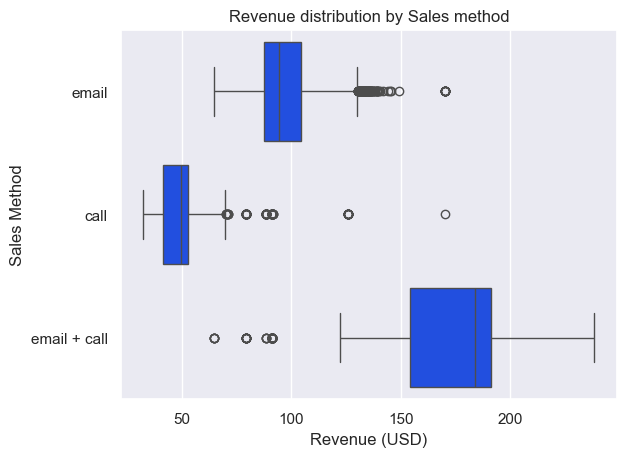

In [24]:
# What is the revenue distribution by sales method?

sns.boxplot(data=sales_mod, y='sales_method', x='revenue', order=order)
plt.xlabel('Revenue (USD)')
plt.ylabel('Sales Method')
plt.title('Revenue distribution by Sales method')
plt.savefig('4_revenue_distribution_by_method.png')
plt.show()

In [25]:
sales_mod.groupby('sales_method')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
call,4962.0,48.861709,11.529866,32.54,41.56,49.850,52.940,170.16
email,7466.0,96.333575,12.041346,64.53,87.52,94.435,104.600,170.16
email + call,2572.0,180.297236,34.154786,64.53,154.17,183.700,191.275,238.32


The boxplot above shows the spread of revenue across the three sales method. The email + call method had the highest median revenue (183 USD). This was followed by the email method (94 USD), and lastly the call method (50 USD)

In terms of the interquantile range (IQR), the boxplot shows that the email + call method had the largest spread. This was followed by the email method, and lastly the call method.

Although the call method required the most effort, it generated the least median and average revenue, making it less efficient. The email method provides a good balance between effort required and generated revenue.

Results imply that conducting follow-up calls after initially contacting customers via email generally produces greater revenue. It is also worth considering that the email + call method requires more effort than email method, and less effort than call method. 



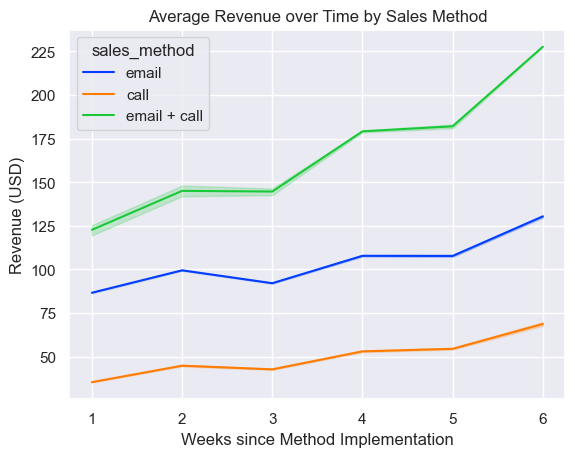

In [26]:
# Was there any difference in revenue over time for each of the methods?

sns.lineplot(data=sales_mod, x='week', y='revenue', hue='sales_method', hue_order=order)
plt.xlabel('Weeks since Method Implementation')
plt.ylabel('Revenue (USD)')
plt.title('Average Revenue over Time by Sales Method')
plt.savefig('5_average_revenue_over_time.png')
plt.show()

The figure above shows a line plot of the average revenue over time by sales method. The graph shows that the three methods have a similar upward trend. 

It can be observed through visual inspection that the email + call method had the greatest positive slope, implying fastest revenue growth among the three methods. The call and email methods had similar slope values, indicating similar revenue growth.

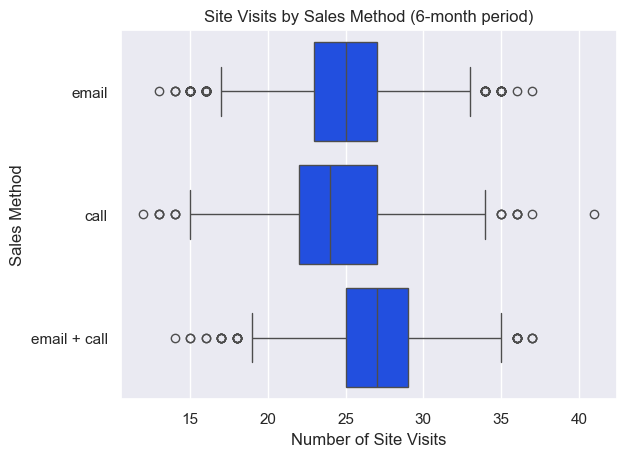

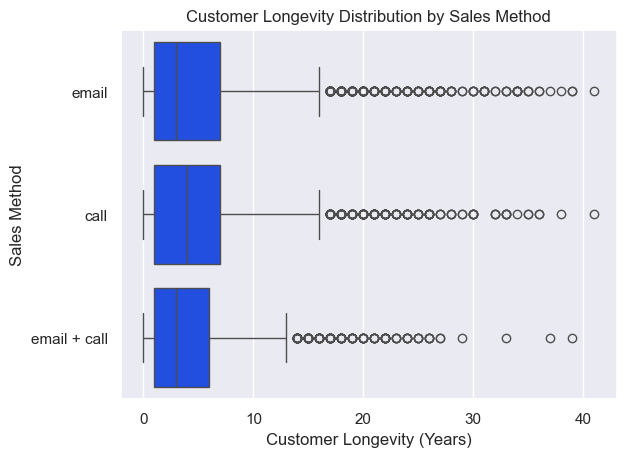

In [27]:
# Based on the data, which method would you recommend we continue to use?
# Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

sns.boxplot(data=sales_mod, y='sales_method', x='nb_site_visits', order=order)
plt.xlabel('Number of Site Visits')
plt.ylabel('Sales Method')
plt.title('Site Visits by Sales Method (6-month period)')
plt.savefig('6_site_visits_distribution.png')
plt.show()

sns.boxplot(data=sales_mod, y='sales_method', x='years_as_customer', order=order)
plt.xlabel('Customer Longevity (Years)')
plt.ylabel('Sales Method')
plt.title('Customer Longevity Distribution by Sales Method')
plt.savefig('7_customer_longevity_distribution.png')
plt.show()

In [28]:
# performing one-way ANOVA test on the average site visits by sales method

alpha = 0.05

anova_site_visits = pg.anova(data=sales_mod, dv='nb_site_visits', between='sales_method')
print(anova_site_visits, '\n')

print("Is the p-value less than the critical value?", anova_site_visits['p-unc'][0] < alpha)

         Source  ddof1  ddof2           F          p-unc       np2
0  sales_method      2  14997  438.985279  5.284877e-186  0.055305 

Is the p-value less than the critical value? True


* **Null hypothesis**: There is no difference between the mean site visits by sales method (email, call, email + call)
* **Alternative hypothesis**: There is a significant difference between the mean site visits by sales method (email, call, email + call)

The p-value is less than the critical value. Therefore, we reject the null hypothesis.

**Conclusion**: There is at least one significantly different mean site visit by sales method.

In [29]:
# performing one-way ANOVA test on the average years as customer by sales method

alpha = 0.05

anova_years_as_customer = pg.anova(data=sales_mod, dv='years_as_customer', between='sales_method')
print(anova_years_as_customer, '\n')

print("Is the p-value less than the critical value?", anova_years_as_customer['p-unc'][0] < alpha)

         Source  ddof1  ddof2          F         p-unc       np2
0  sales_method      2  14997  15.066406  2.906080e-07  0.002005 

Is the p-value less than the critical value? True


* **Null hypothesis**: There is no difference between the mean customer longevity by sales method (email, call, email + call)
* **Alternative hypothesis**: There is a significant difference between the mean customer longevity by sales method (email, call, email + call)

The p-value is less than the critical value. Therefore, we reject the null hypothesis.

**Conclusion**: There is at least one significantly different mean customer longevity by sales method.

### Which sales method is the most efficient in terms of revenue and effort required?

Given the results of our analysis, the email + call method generated the highest amount of revenue while requiring the second least amount of effort from the sales team. In other words, **email + call is the most efficient method** in terms of revenue and effort required. Furthermore, the email method also generated good revenues while requiring the least effort. This makes the email method a good second choice method in terms of revenue-effort efficiency. Since the email method has the least required effort and can be automated, it can reach to a large number of customers which is also beneficial for the company. 

On the other hand, the call method generated the least amount of revenue while requiring the most amount of effort, making it extremely inefficient. 

In summary:
* **Email + Call** → Generated the highest revenue while requiring the second least effort, making it the most efficient method overall.
    * If we plan to **maximize revenue**, we can focus on implementing the **email + call** method.
* **Email** → Produced good revenues with the least effort (and scalable through automation), making it the next best choice in terms of revenue-effort efficiency.
    * If we plan to **maximize customer reach**, we can focus on implementing the **email** method.
* **Call** → Least efficient sales method.

## Business Metrics

To monitor the effectiveness of each sales method, I propose using the average revenue per customer segemented by sales method. This metric will give us a good understanding of customer behavior and value with respect to the sales method implemented. The average revenue per customer can be updated weekly, monthly, etc. to measure the performance of the sales methods.

From the 6-week dataset, the baseline value for the average revenue per customer is the following:

| Sales Method | Average Revenue per Customer (USD) |
|---:|:---:|
| call | 48.86 |
| email | 96.33 |
| email + call | 180.30 |

Therefore, if this number is increasing for the next 6 weeks, it indicates a very good sign that the proposed sales method is working.

In [30]:
sales_summary = sales_mod.groupby('sales_method').agg({'revenue':'sum', 'customer_id':'count'}).reset_index()
sales_summary.columns = ['sales_method', 'total_revenue', 'total_customer']
sales_summary['avg_revenue_per_customer (USD)'] = (sales_summary['total_revenue'] / sales_summary['total_customer']).round(2)
sales_summary

,sales_method,total_revenue,total_customer,avg_revenue_per_customer (USD)
0,call,242451.80,4962,48.86
1,email,719226.47,7466,96.33
2,email + call,463724.49,2572,180.30


## Summary and Recommendations

The analysis reveals that the **email + call method** generates the highest average revenue per customer, making it the most efficient strategy in maximizing revenue and minimizing effort. I recommend focusing this method implementation to maximize pure financial return.

The **email method** showed a good second choice method because it generates good revenues with the least amount of effort. I recommend this sales method when the priority is to maximize customer reach.

Over the following weeks, I recommend using key metrics such as the **average revenue per customer** to monitor the performance of the implemented sales method.

It would be recommended to acquire individual product information (i.e. price, quantity, discounts) as these may provide additional insights and further strengthen the analysis.